# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename, header=0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [3]:
df['income_binary'].value_counts()

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

In [5]:
df.shape

(32561, 15)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

We will be working with the census data from 1994, which is stored in the "censusData.csv" dataset. 

Define the Label: This machine learning model aims to predict whether a person's income is higher than $50K. This is an example of supervised learning and is a binary classification problem. In our dataset, our label will be the "income_binary" column with two values "<=50K" and ">50K".

Identify features: The features will be the remaining dataset. This is subject to change afterwe explore our data in depth.

Predicting whether a person's income exceeds $50K is important because it allows researchers to identify salary across demographics and take responsible actions. For example, based on how many years a person's education is, researchers can predict their income and provide accommodations if needed.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

ADDRESSING MISSINGNESS

In [6]:
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64

In [7]:
condition = nan_count != 0
nan_col_types = df[list(nan_count[condition].index)].dtypes
nan_col_types

age               float64
workclass          object
occupation         object
hours-per-week    float64
native-country     object
dtype: object

For columns with numerical values (which are "age" and "hours-per-week"), we will replace the missing data with the means,

In [8]:
mean_hours = df['hours-per-week'].mean()
df['hours-per-week'].fillna(value=mean_hours,inplace=True)
mean_age = df['age'].mean()
df['age'].fillna(value=mean_age,inplace=True)

In [9]:
np.sum(df['age'].isnull(), axis = 0)

0

In [10]:
np.sum(df['hours-per-week'].isnull(), axis = 0)

0

ONE-HOT ENCODING

In [11]:
df.nunique()

age                  74
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex_selfID            2
capital-gain        106
capital-loss         92
hours-per-week       95
native-country       41
income_binary         2
dtype: int64

In [12]:
to_be_encoded = ['race','sex_selfID']

In [13]:
df_encoded = pd.get_dummies(df[to_be_encoded])
df_encoded.head(5)

,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female
0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,1
2,0,0,0,0,1,0,1
3,0,0,1,0,0,0,1
4,0,0,1,0,0,1,0


In [14]:
df = df.join(df_encoded)
df.drop(columns = to_be_encoded, inplace=True)

In [15]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country,income_binary,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,40.0,United-States,<=50K,0,0,0,0,1,0,1
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,13.0,United-States,<=50K,0,0,0,0,1,0,1
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,40.0,United-States,<=50K,0,0,0,0,1,0,1
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,40.0,United-States,<=50K,0,0,1,0,0,0,1
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,40.0,Cuba,<=50K,0,0,1,0,0,1,0


In [16]:
df.dtypes

age                        float64
workclass                   object
fnlwgt                       int64
education                   object
education-num                int64
marital-status              object
occupation                  object
relationship                object
capital-gain                 int64
capital-loss                 int64
hours-per-week             float64
native-country              object
income_binary               object
race_Amer-Indian-Inuit       uint8
race_Asian-Pac-Islander      uint8
race_Black                   uint8
race_Other                   uint8
race_White                   uint8
sex_selfID_Female            uint8
sex_selfID_Non-Female        uint8
dtype: object

In [17]:
# label
y = df['income_binary'].replace({'<=50K': 0, '>50K': 1})

REMOVING IRRELEVANT COLUMNS
We are getting rid of columns with categorical values where one-hot encoding cannot be applied appropriately. 

In [18]:
X = df.drop(columns=df.select_dtypes(include=['object']).columns)

In [19]:
X.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,race_Amer-Indian-Inuit,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_selfID_Female,sex_selfID_Non-Female
0,39.0,77516,13,2174,0,40.0,0,0,0,0,1,0,1
1,50.0,83311,13,0,0,13.0,0,0,0,0,1,0,1
2,38.0,215646,9,0,0,40.0,0,0,0,0,1,0,1
3,53.0,234721,7,0,0,40.0,0,0,1,0,0,0,1
4,28.0,338409,13,0,0,40.0,0,0,1,0,0,1,0


For the 'fnlwgt' column where the numerical values differ variously, we want to get rid of outliers.

In [20]:
from scipy.stats import mstats
X['fnlwgt'] = mstats.winsorize(df['fnlwgt'], limits=[0.05, 0.05])

Since our consensus dataset is quite simple, a Logistic Regression model would perform well. We have already one-hot encoded some of the categorical variables that are most fit, removing unnecessary columns and imputing missing values. We are ready for modeling.


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

The new feature list consists of these columns: "age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week", "race", and "sex_selfID".
I first need to replace all missing values with means for numerical columns. For categorical columns, I chose the appropriate columns to one-hot encode. Finally, I removed outliers.
My model is a Logistic Regression model. I plan to first train the model with default parameters. Then I will perform grid search cross validation to choose the best C. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10,random_state=1234)

In [23]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [24]:
# comparison of predictions between the predict_proba() method and predict()
proba_predictions = model.predict_proba(X_test)
proba_predictions_org = []
for i in proba_predictions:
    proba_predictions_org.append(i[1])
class_label_predictions_org = model.predict(X_test)

In [25]:
# confusion matrix
c_m = confusion_matrix(y_test, class_label_predictions_org, labels=[True,False])
pd.DataFrame(
    c_m,
    columns=['Predicted: Income >50K', 'Predicted: Income <=50K'],
    index=['Actual: Income >50K', 'Actual: Income <=50K']
)

,Predicted: Income >50K,Predicted: Income <=50K
Actual: Income >50K,325,452
Actual: Income <=50K,127,2353


Finding the optimal C

In [26]:
cs=[10**i for i in range(-5,5)]
param_grid = dict(C = list(cs))
model2 = LogisticRegression(max_iter=1000)
grid = GridSearchCV(model2, param_grid, cv=5)
grid_search = grid.fit(X_train, y_train)
print('Done')

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Done


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
# finding best C
best_C = grid_search.best_params_['C']
best_C

10

In [28]:
# training the best model
model_best = LogisticRegression(C = best_C, max_iter=1000)
model_best.fit(X_train, y_train)

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, max_iter=1000)

In [29]:
proba_predictions = model_best.predict_proba(X_test)
proba_predictions_best = []
for i in proba_predictions:
    proba_predictions_best.append(i[1])
class_label_predictions_best = model_best.predict(X_test)

In [30]:
c_m = confusion_matrix(y_test, class_label_predictions_best, labels=[True,False])
pd.DataFrame(
    c_m,
    columns=['Predicted: Income >50K', 'Predicted: Income <=50K'],
    index=['Actual: Income >50K', 'Actual: Income <=50K']
)

,Predicted: Income >50K,Predicted: Income <=50K
Actual: Income >50K,311,466
Actual: Income <=50K,107,2373


The two confusion matrixes seem not sufficient to differentiate the differences in performance between the two models. Hence, we will continute to plot precision-recall curves.

In [31]:
precision_org, recall_org, thresholds_org = precision_recall_curve(y_test, proba_predictions_org)
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, proba_predictions_best)

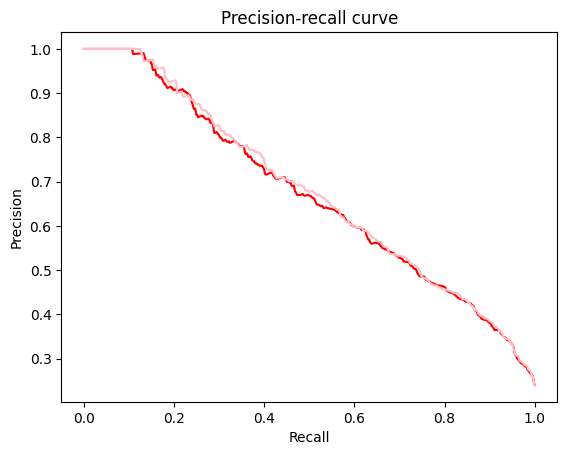

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
sns.lineplot(x=recall_org, y=precision_org, color='red')
sns.lineplot(x=recall_best, y=precision_best, color='pink')
plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()